In [51]:
import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from heapq import nlargest

sid = SentimentIntensityAnalyzer()
lemma = WordNetLemmatizer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/k1anders/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/k1anders/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/k1anders/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/k1anders/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/k1anders/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [52]:
def get_sentiment(filepath):
    df = pd.read_csv(filepath)
    
    df["full_text"] = df["title"] + " " + df["selftext"]
    df["sent_score"] = df["full_text"].apply(lambda review: sid.polarity_scores(review))
    df["compound"] = df["sent_score"].apply(lambda score_dict: score_dict["compound"])
    df["sentiment"] = df["compound"].apply(lambda c: "pos" if c > 0 else ("neu" if c == 0 else "neg"))
    
    return df

In [53]:
georgetown = get_sentiment("data/private/georgetown/georgetown_all_time.csv")
brown = get_sentiment("data/private/BrownU/BrownU_all_time.csv")
harvard = get_sentiment("data/private/Harvard/Harvard_all_time.csv")
upenn = get_sentiment("data/private/UPenn/UPenn_all_time.csv")
usc = get_sentiment("data/private/USC/USC_all_time.csv")
syracuse = get_sentiment("data/private/Syracuse/Syracuse_all_time.csv")
columbia = get_sentiment("data/private/columbia/columbia_all_time.csv")
mit = get_sentiment("data/private/mit/mit_all_time.csv")
notredame = get_sentiment("data/private/notredame/notredame_all_time.csv")
stanford = get_sentiment("data/private/stanford/stanford_all_time.csv")
yale = get_sentiment("data/private/yale/yale_all_time.csv")
bostonU = get_sentiment("data/private/BostonU/BostonU_all_time.csv")

In [54]:
unis = {
    'Georgetown':   georgetown,
    'Brown':        brown,
    'Harvard':      harvard,
    'Upenn':        upenn,
    'USC':          usc,
    'Syracuse':     syracuse,
    'Columbia':     columbia,
    'MIT':          mit,
    'Notredame':    notredame,
    'Stanford':     stanford,
    'Yale':         yale,
    'Boston':       bostonU
}

In [55]:
palette ={"pos": "#009E73", "neu": "#F0E442", "neg": "#D55E00"} # change colors to colorblind friendly hex colors

def countplot_per_year_per_uni(uni, uni_data):
    data = uni_data.copy()
    fig, ax = plt.subplots(figsize=(10,5))          # you can change the size here
    fig.suptitle(uni)

    data.created_utc = pd.to_datetime(data['created_utc'], format='%Y-%m-%d %H:%M:%S')
    data.created_utc = data.created_utc.dt.strftime('%Y')
    data.sentiment = data.sentiment.astype("category") # set to categorical 
    sns.countplot(x = 'created_utc', hue = 'sentiment', data = data, ax=ax, palette = palette)
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    ax.set_xlabel('Year')

def countplot_per_month_per_year_per_uni(uni, uni_data):
    data = uni_data.copy()
    data.created_utc = pd.to_datetime(data['created_utc'], format='%Y-%m-%d %H:%M:%S')
    groups = data.groupby(by=data.created_utc.dt.year)[['created_utc', 'sentiment']]
#     Uncomment below to see the raw data count with dates.
#     for key, item in groups:
#         print(groups.get_group(key), "\n\n")

    fig, ax = plt.subplots(5, figsize=(15,15))      # you can change the size here
    fig.suptitle(uni + '\n')

    for i, (year, df) in enumerate(groups):
        df.created_utc = df.created_utc.dt.strftime('%B')
        df.sentiment = df.sentiment.astype("category") # set to categorical
        
        sns.countplot(x = 'created_utc', hue = 'sentiment', data = df, ax=ax[i], palette=palette)
        ax[i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        ax[i].set_title(year)
        ax[i].set_xlabel('')
        plt.tight_layout()

def pieplot_per_uni(uni, uni_df):
    fig, ax = plt.subplots(figsize=(7,7))           # you can change the size here
    fig.suptitle(uni)
    pd.DataFrame(data=uni_df.sentiment.value_counts()).plot.pie(y='sentiment', ax=ax)

def pieplot_per_year_per_uni(uni, uni_df):
    data = uni_df.copy()

    data.created_utc = pd.to_datetime(data['created_utc'], format='%Y-%m-%d %H:%M:%S')
    groups = data.groupby(by=data.created_utc.dt.year)[['created_utc', 'sentiment']]

    fig, ax = plt.subplots(ncols=5, figsize=(15,15)) # you can change the size here
    fig.suptitle(uni)

    for i, (year, df) in enumerate(groups):
        pd.DataFrame(data=df.sentiment.value_counts()).plot.pie(y='sentiment', ax=ax[i])
        ax[i].set_title(year)

    plt.tight_layout()
    fig.subplots_adjust(top=1.7)                    # adjust this for position of figure title

## $$GEORGETOWN$$

In [56]:
countplot_per_year_per_uni('Georgetown', georgetown)
countplot_per_month_per_year_per_uni('Georgetown', georgetown)
pieplot_per_uni('Georgetown', georgetown)
pieplot_per_year_per_uni('Georgetown', georgetown)


## $$ BROWN $$

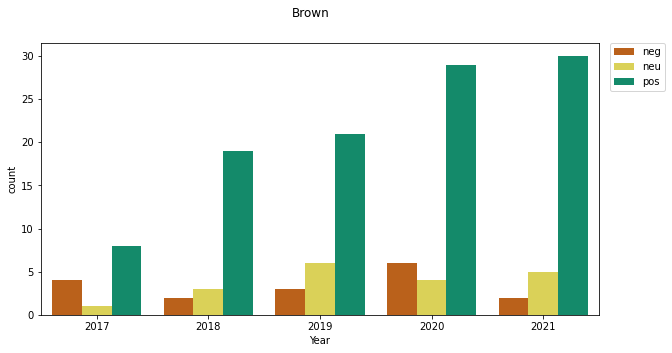

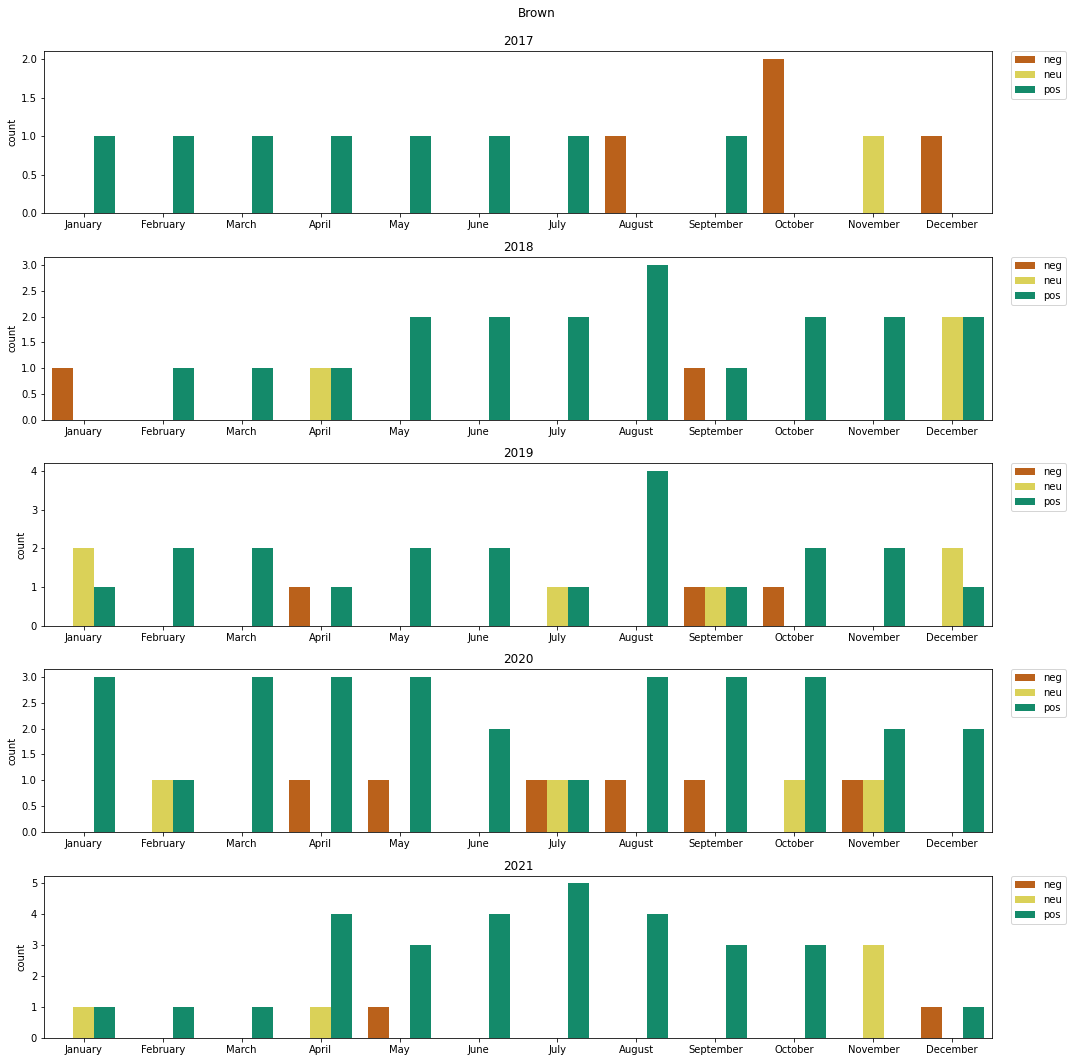

In [57]:
countplot_per_year_per_uni('Brown', brown)
countplot_per_month_per_year_per_uni('Brown', brown)
# pieplot_per_uni('Brown', brown)
# pieplot_per_year_per_uni('Brown', brown)

## $$ HARVARD $$

In [ ]:
countplot_per_year_per_uni('Harvard', harvard)
countplot_per_month_per_year_per_uni('Harvard', harvard)
pieplot_per_uni('Harvard', harvard)
pieplot_per_year_per_uni('Harvard', harvard)

## $$ UPENN $$

In [ ]:
countplot_per_year_per_uni('Upenn', upenn)
countplot_per_month_per_year_per_uni('Upenn', upenn)
pieplot_per_uni('Upenn', upenn)
pieplot_per_year_per_uni('Upenn', upenn)

## $$ USC $$

In [ ]:
countplot_per_year_per_uni('USC', usc)
countplot_per_month_per_year_per_uni('USC', usc)
pieplot_per_uni('USC', usc)
pieplot_per_year_per_uni('USC', usc)

## $$ SYRACUSE $$

In [ ]:
countplot_per_year_per_uni('Syracuse', syracuse)
countplot_per_month_per_year_per_uni('Syracuse', syracuse)
pieplot_per_uni('Syracuse', syracuse)
pieplot_per_year_per_uni('Syracuse', syracuse)

## $$ COLUMBIA $$

In [ ]:
countplot_per_year_per_uni('Columbia', columbia)
countplot_per_month_per_year_per_uni('Columbia', columbia)
pieplot_per_uni('Columbia', columbia)
pieplot_per_year_per_uni('Columbia', columbia)

## $$ MIT $$

In [ ]:
countplot_per_year_per_uni('MIT', mit)
countplot_per_month_per_year_per_uni('MIT', mit)
pieplot_per_uni('MIT', mit)
pieplot_per_year_per_uni('MIT', mit)

## $$ NOTREDAME $$

In [ ]:
countplot_per_year_per_uni('Notredame', notredame)
countplot_per_month_per_year_per_uni('Notredame', notredame)
pieplot_per_uni('Notredame', notredame)
pieplot_per_year_per_uni('Notredame', notredame)

## $$ STANFORD $$

In [ ]:
countplot_per_year_per_uni('Stanford', stanford)
countplot_per_month_per_year_per_uni('Stanford', stanford)
pieplot_per_uni('Stanford', stanford)
pieplot_per_year_per_uni('Stanford', stanford)

## $$ YALE $$

In [ ]:
countplot_per_year_per_uni('Yale', yale)
countplot_per_month_per_year_per_uni('Yale', yale)
pieplot_per_uni('Yale', yale)
pieplot_per_year_per_uni('Yale', yale)

## $$ BOSTON $$

In [ ]:
countplot_per_year_per_uni('Boston', bostonU)
countplot_per_month_per_year_per_uni('Boston', bostonU)
pieplot_per_uni('Boston', bostonU)
pieplot_per_year_per_uni('Boston', bostonU)